In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

from sklearn.pipeline import Pipeline


In [2]:

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000


In [3]:

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [4]:

print(X.shape, y.shape)

(70000, 784) (70000,)


In [5]:

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000)


In [6]:

print(X.shape, y.shape, X_train.shape, X_test.shape)

(70000, 784) (70000,) (5000, 784) (10000, 784)


In [8]:
piper = Pipeline([
    ('scaler', StandardScaler() ),
    ('logit', LogisticRegression(C=50./train_samples, penalty='l1', solver='saga', tol=0.1) )
])

piper

#print(pipeline.get_params())

print( type(piper.get_params()['logit']) )

#dir(piper)

<class 'sklearn.linear_model.logistic.LogisticRegression'>


In [10]:
piper.fit(X_train, y_train) 

sparsity = np.mean( piper.get_params()['logit'].coef_ == 0) * 100 
score = piper.score(X_test, y_test)

print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

/home/moranis/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Sparsity with L1 penalty: 58.85%
Test score with L1 penalty: 0.7830


Example run in 189.526 s


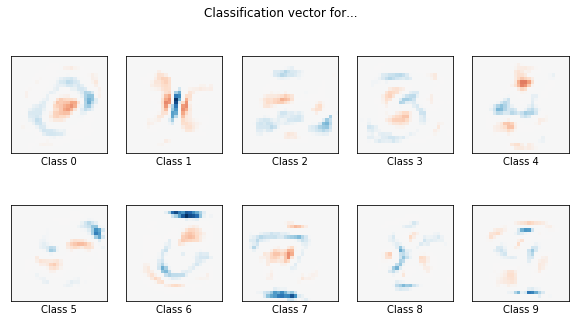

In [13]:

COEF = piper.get_params()['logit'].coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(COEF).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(COEF[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

run_time = time.time() - t0
print('Example run in %.3f s' % run_time)
plt.show()